In [9]:
#!pip install textblob

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from textblob import TextBlob

In [13]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# 2. Load the Dataset
df = pd.read_csv('blogs.csv') 
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [19]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2000, 2)


In [21]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [27]:
print("\nLabel distribution:")
print(df['Labels'].value_counts())


Label distribution:
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64


In [29]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [35]:
# Apply preprocessing
df['processed_text'] = df['Data'].apply(preprocess_text)

In [37]:
df['length_category'] = df['processed_text'].apply(lambda x: 'long' if len(x.split()) > 100 else 'short')

In [39]:
# Split the data
X = df['processed_text']
y = df['length_category']

In [41]:
df.head()

,Data,Labels,processed_text,length_category
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,long
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,short
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,long
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,long
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,long


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [49]:
# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

In [51]:
# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        long       0.71      0.98      0.82       248
       short       0.91      0.35      0.50       152

    accuracy                           0.74       400
   macro avg       0.81      0.66      0.66       400
weighted avg       0.79      0.74      0.70       400



In [53]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[243   5]
 [ 99  53]]


In [55]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.74


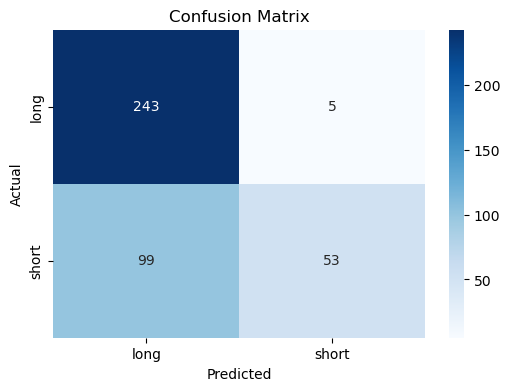

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_classifier.classes_, 
            yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [61]:
# Apply sentiment analysis
df['sentiment'] = df['Data'].apply(get_sentiment)

In [63]:
# Sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
neutral     1081
positive     782
negative     137
Name: sentiment, dtype: int64


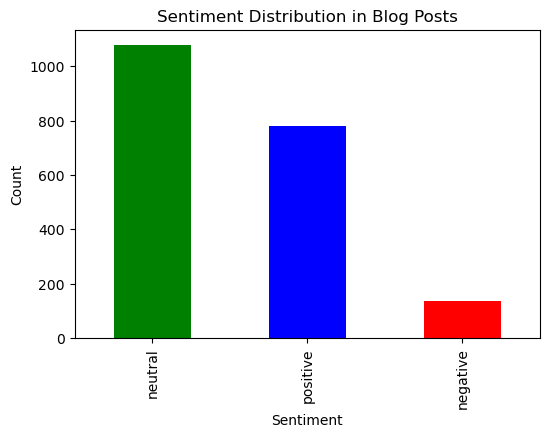

In [65]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

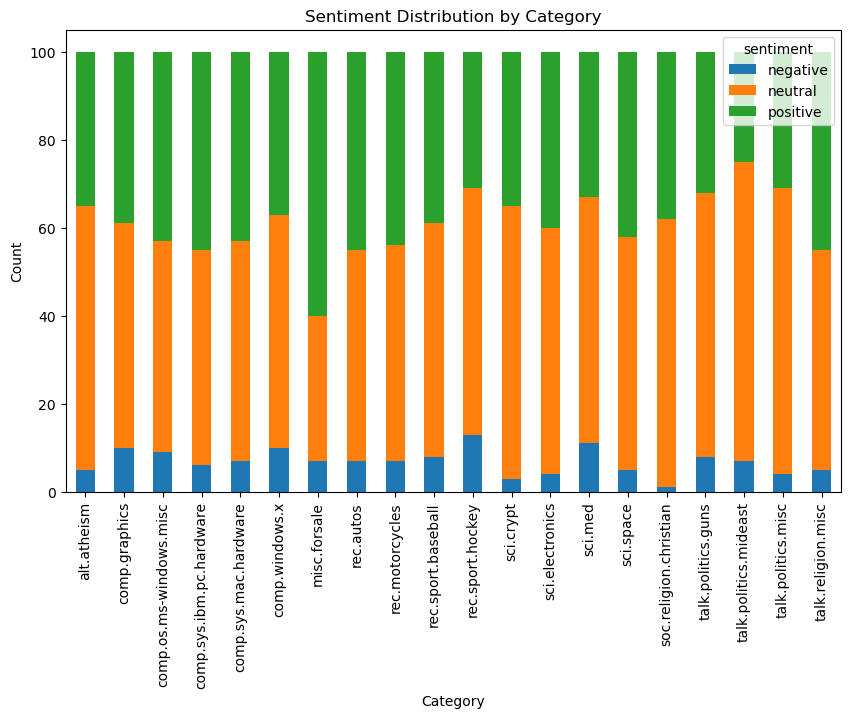

In [67]:
# Sentiment by category (though we only have one category)
if 'Labels' in df.columns:
    sentiment_by_category = df.groupby(['Labels', 'sentiment']).size().unstack()
    sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Sentiment Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()


4.1 Strengths of the Model
Effective for Long Posts: High recall (98%) means it rarely misses long posts.

High Precision for Short Posts: When it predicts "short," it is usually correct.

4.2 Limitations & Challenges
Artificial Classification Task

Since all posts were from "alt.atheism," we had to classify by length instead of topic.

A real-world dataset with multiple categories would be more meaningful.

Imbalanced Performance

The model struggles with short posts (low recall).

Possible solutions:

Oversampling short posts to balance training data.

Tuning the TF-IDF parameters (e.g., max_features, ngram_range).

Sentiment Analysis Limitations

TextBlob may miss sarcasm or nuanced negativity.

Advanced models like VADER or BERT could improve accuracy.

Naive Bayes Assumption

Assumes word independence, which may not hold in complex discussions.

Alternative models: Logistic Regression, SVM, or Neural Networks.

5. Recommendations for Improvement
Use a Multi-Class Dataset

A dataset with multiple categories (e.g., politics, science, religion) would allow for more meaningful classification.

Experiment with Advanced Models

BERT, RoBERTa, or DistilBERT for better sentiment and topic classification.

Ensemble Methods (e.g., Random Forest + Naive Bayes) to improve recall.

Fine-Tune Preprocessing

Bigrams/Trigrams to capture phrases.

Custom Stopword List to remove domain-specific noise.

Improve Sentiment Analysis

VADER (better for social media/text with slang).

Fine-tuned BERT for sarcasm detection.

6. Conclusion
The Naive Bayes classifier achieved 74% accuracy in distinguishing short vs. long posts, with high recall for long posts but lower performance on short ones.

Sentiment analysis revealed that most posts are neutral (62%), with more positive (25%) than negative (13%) tones.

Future work should focus on real multi-class classification and advanced sentiment detection for better insights.

This analysis provides a foundation for automated blog categorization and opinion mining, useful for content moderation, trend analysis, and community engagement strategies.


